In [2]:
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
data = pd.read_csv('/gdrive/My Drive/DecisionTree/DataMining509/politics_comments.csv')
data = data.rename(columns={'Comment Body': 'Comment_Body'})
data

,Comment ID,Author,Timestamp,Comment is a reply to,Comment Thread ID,Thread Title,Comment_Body,Comment Permalink
0,jcpnsyf,AutoModerator,2023-03-18 16:22:23,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,"\nAs a reminder, this subreddit [is for civil ...",/r/politics/comments/11uspwb/trump_deregulated...
1,jcpoopj,DriftlessDairy,2023-03-18 16:28:23,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,Why is it the Party of Personal Responsibility...,/r/politics/comments/11uspwb/trump_deregulated...
2,jcpoxe1,Ban-Circumcision-Now,2023-03-18 16:30:03,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,So the typical republican strategy: deregulate...,/r/politics/comments/11uspwb/trump_deregulated...
3,jcpowhh,Inevitable-Ad-4192,2023-03-18 16:29:53,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,Has Trump ever taken responsibility for anythi...,/r/politics/comments/11uspwb/trump_deregulated...
4,jcpoo0t,iRedditAlreadyyy,2023-03-18 16:28:15,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,"I mean, he was literally caught cheating on hi...",/r/politics/comments/11uspwb/trump_deregulated...
...,...,...,...,...,...,...,...,...
6007,jcmxj59,CommanderChico,2023-03-18 00:11:38,t1_jcmw8qu,11u6g82,Lawmaker pauses filibuster on agreement to deb...,"Right, these people are troubled, and the ""evi...",/r/politics/comments/11u6g82/lawmaker_pauses_f...
6008,jcmxxxs,ArchaeoJones,2023-03-18 00:14:37,t1_jcmw58h,11u6g82,Lawmaker pauses filibuster on agreement to deb...,Why do you think a study that ENDED 20 years a...,/r/politics/comments/11u6g82/lawmaker_pauses_f...
6009,jcmy267,CAESTULA,2023-03-18 00:15:29,t1_jcmxj59,11u6g82,Lawmaker pauses filibuster on agreement to deb...,I'm gonna go with what the *majority of doctor...,/r/politics/comments/11u6g82/lawmaker_pauses_f...
6010,jcmyvi2,wee99001,2023-03-18 00:21:26,t1_jcmxj59,11u6g82,Lawmaker pauses filibuster on agreement to deb...,So once it no longer proves the point you thin...,/r/politics/comments/11u6g82/lawmaker_pauses_f...


In [5]:
data["Comment_Body"] = data["Comment_Body"].astype(str)

In [6]:
# Create a new column containing the length each headline text
data["review_text_len"] = data["Comment_Body"].apply(lambda x : len(x.split()))

In [7]:
data_text = data[['Comment_Body']];

In [8]:
print("The longest review has: {} words".format(data.review_text_len.max()))

The longest review has: 1090 words


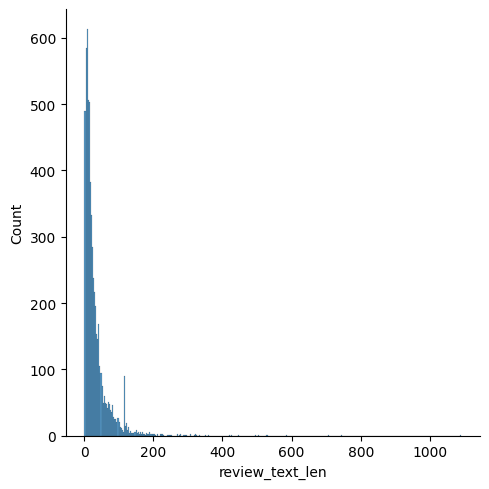

In [9]:
# Visualize the length distribution 
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data.review_text_len, kde=False)

In [10]:
for idx in data.sample(3).index:
    review = data.iloc[idx]
    print("Headline #{}:".format(idx))
    print("Publication date: {}".format(review.Timestamp))
    print("Text: {}\n".format(review.Comment_Body))

Headline #2006:
Publication date: 2023-03-18 20:57:23
Text: I hope those idiots all wear tactical cleats and ruin the entire golf course.

Headline #2590:
Publication date: 2023-03-18 20:17:07
Text: It inoculates centrists against the contagion of fascist antisemitism. The more regular folks know the harder it will be for fascism to grow.

Headline #2185:
Publication date: 2023-03-18 18:13:14
Text: It will get the overweight, wannabe soldiers with their cheap vests out of their parent’s basement to try and protect their Supreme Leader. They want to protect the leader of MAGAstan.



In [11]:
!pip install bertopic
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7)
review_topics, _ = model.fit_transform(data.Comment_Body)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 65.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
    

Batches:   0%|          | 0/188 [00:00<?, ?it/s]

2023-04-23 23:13:59,734 - BERTopic - Transformed documents to Embeddings
2023-04-23 23:14:42,355 - BERTopic - Reduced dimensionality
2023-04-23 23:14:42,644 - BERTopic - Clustered reduced embeddings


In [12]:
review_topics, _ = model.fit_transform(data.Comment_Body)

Batches:   0%|          | 0/188 [00:00<?, ?it/s]

2023-04-23 23:17:02,800 - BERTopic - Transformed documents to Embeddings
2023-04-23 23:17:18,590 - BERTopic - Reduced dimensionality
2023-04-23 23:17:18,875 - BERTopic - Clustered reduced embeddings


In [13]:
from umap import UMAP

In [14]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)
# Initiate BERTopic
model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
review_topics, probabilities = model.fit_transform(data.Comment_Body)

2023-04-23 23:21:37,581 - BERTopic - Transformed documents to Embeddings
2023-04-23 23:21:53,741 - BERTopic - Reduced dimensionality
2023-04-23 23:21:57,696 - BERTopic - Clustered reduced embeddings


In [15]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 108


,Topic,Count,Name
0,-1,2545,-1_the_to_and_of
1,0,170,0_her_she_shes_lock
2,1,137,1_bank_banks_svb_insurance
3,2,104,2_laws_enforce_federal_funding
4,3,92,3_desantis_trump_ron_he


In [16]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('her', 0.05418067782477347),
 ('she', 0.049463248107731936),
 ('shes', 0.027404247428774755),
 ('lock', 0.024180218319507136),
 ('mtg', 0.01833033336698207),
 ('up', 0.014675724142517997),
 ('the', 0.008024874313470673),
 ('has', 0.007976529240427289),
 ('stop', 0.007880482064400424),
 ('whitmer', 0.007660042634358511)]

In [17]:
model.visualize_barchart(top_n_topics=6)

In [18]:
model.visualize_topics(top_n_topics=6)

In [19]:
model.visualize_hierarchy(top_n_topics=30)

In [20]:
# Select most 3 similar topics
similar_topics, similarity = model.find_topics("politics", top_n = 3)

In [21]:
similar_topics 

[6, 32, 63]

In [22]:
most_similar = similar_topics[0]
print("The Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

The Most Similar Topic Info: 
[('gop', 0.03424778749114452), ('republicans', 0.0217793844340175), ('party', 0.016263922676094753), ('republican', 0.015554998889817382), ('democrats', 0.014181180147720317), ('they', 0.013069558304441306), ('admin', 0.012223825616640536), ('blame', 0.012024520128013014), ('are', 0.011892434013560457), ('evil', 0.010781162253930261)]
Similarity Score: 0.6595587295128504


In [23]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Create a new dataframe regarding Trump
df = data[data['Comment_Body'].str.contains('trump|Trump')]
df = df.reset_index(drop=True)
df

,Comment ID,Author,Timestamp,Comment is a reply to,Comment Thread ID,Thread Title,Comment_Body,Comment Permalink,review_text_len
0,jcpowhh,Inevitable-Ad-4192,2023-03-18 16:29:53,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,Has Trump ever taken responsibility for anythi...,/r/politics/comments/11uspwb/trump_deregulated...,22
1,jcprh1h,SeveralScenery,2023-03-18 16:47:24,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,Who would have thought that the man who bankru...,/r/politics/comments/11uspwb/trump_deregulated...,29
2,jcpqn12,DistortedSystem,2023-03-18 16:41:46,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,"Typical Trump, blaming others for his own mess...",/r/politics/comments/11uspwb/trump_deregulated...,23
3,jcpr9os,DistortedSystem,2023-03-18 16:46:06,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,"Well, what else is new? Trump always blames so...",/r/politics/comments/11uspwb/trump_deregulated...,24
4,jcqgu75,-misanthroptimist,2023-03-18 19:40:29,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,"Since Trump is six years old emotionally, ever...",/r/politics/comments/11uspwb/trump_deregulated...,12
...,...,...,...,...,...,...,...,...,...
616,jcoupuj,chowderbags,2023-03-18 12:43:06,t1_jcniugy,11u7nn5,Donald Trump Could Be Indicted by New York Pro...,"Don't worry, Trump will probably get work rele...",/r/politics/comments/11u7nn5/donald_trump_coul...,24
617,jcpwbki,North_Activist,2023-03-18 17:19:31,t1_jcols4s,11u7nn5,Donald Trump Could Be Indicted by New York Pro...,"I’m not saying they’re immune, I’m saying it’s...",/r/politics/comments/11u7nn5/donald_trump_coul...,98
618,jcnnndm,phaedrus71,2023-03-18 03:44:38,t1_jcnlf1m,11u7nn5,Donald Trump Could Be Indicted by New York Pro...,If its what you say I love it.\nAnd the idea T...,/r/politics/comments/11u7nn5/donald_trump_coul...,23
619,jcmo486,Long_Before_Sunrise,2023-03-17 23:02:46,t3_11u6opt,11u6opt,State voter fraud system fractures as Republic...,">""It’s notable that the states at the forefron...",/r/politics/comments/11u6opt/state_voter_fraud...,74


In [27]:
!python -m spacy download en_core_web_lg

2023-04-23 23:22:42.477195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [28]:
import spacy
import re
#loads the pre-trained spaCy model for English language processing, 
nlp = spacy.load("en_core_web_lg")

# function to return a string that represents the lemmatized version of the input 
def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)

In [29]:
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

# to remove URLs
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# to remove html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [30]:
df['Comment_Body'] = df['Comment_Body'].apply(remove_URL)
df['Comment_Body'] = df['Comment_Body'].apply(remove_html)
#df['review'] = df['review'].apply(alpha_num)
#df['review'] = df['review'].apply(normalize, lowercase=True, remove_stopwords=True)

In [31]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.0 MB/s eta 0:00:00


In [49]:
v_predicted = []
for text in df['Comment_Body']:
    sent = sentiment.polarity_scores(text)
    if sent['compound']>0.2: 
        v_predicted.append("Positive")
    elif sent['compound']<0.2: 
        v_predicted.append("Negative")
    else:
        v_predicted.append("Neutral")
df['label'] = pd.DataFrame(v_predicted)
df

,Comment ID,Author,Timestamp,Comment is a reply to,Comment Thread ID,Thread Title,Comment_Body,Comment Permalink,review_text_len,label
0,jcpowhh,Inevitable-Ad-4192,2023-03-18 16:29:53,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,Has Trump ever taken responsibility for anythi...,/r/politics/comments/11uspwb/trump_deregulated...,22,Negative
1,jcprh1h,SeveralScenery,2023-03-18 16:47:24,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,Who would have thought that the man who bankru...,/r/politics/comments/11uspwb/trump_deregulated...,29,Negative
2,jcpqn12,DistortedSystem,2023-03-18 16:41:46,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,"Typical Trump, blaming others for his own mess...",/r/politics/comments/11uspwb/trump_deregulated...,23,Negative
3,jcpr9os,DistortedSystem,2023-03-18 16:46:06,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,"Well, what else is new? Trump always blames so...",/r/politics/comments/11uspwb/trump_deregulated...,24,Negative
4,jcqgu75,-misanthroptimist,2023-03-18 19:40:29,t3_11uspwb,11uspwb,Trump deregulated railways and banks. He blame...,"Since Trump is six years old emotionally, ever...",/r/politics/comments/11uspwb/trump_deregulated...,12,Negative
...,...,...,...,...,...,...,...,...,...,...
616,jcoupuj,chowderbags,2023-03-18 12:43:06,t1_jcniugy,11u7nn5,Donald Trump Could Be Indicted by New York Pro...,"Don't worry, Trump will probably get work rele...",/r/politics/comments/11u7nn5/donald_trump_coul...,24,Positive
617,jcpwbki,North_Activist,2023-03-18 17:19:31,t1_jcols4s,11u7nn5,Donald Trump Could Be Indicted by New York Pro...,"I’m not saying they’re immune, I’m saying it’s...",/r/politics/comments/11u7nn5/donald_trump_coul...,98,Negative
618,jcnnndm,phaedrus71,2023-03-18 03:44:38,t1_jcnlf1m,11u7nn5,Donald Trump Could Be Indicted by New York Pro...,If its what you say I love it.\nAnd the idea T...,/r/politics/comments/11u7nn5/donald_trump_coul...,23,Positive
619,jcmo486,Long_Before_Sunrise,2023-03-17 23:02:46,t3_11u6opt,11u6opt,State voter fraud system fractures as Republic...,">""It’s notable that the states at the forefron...",/r/politics/comments/11u6opt/state_voter_fraud...,74,Positive


In [45]:
df.to_csv('123.csv', index=False)

In [33]:
from sklearn.model_selection import train_test_split
# train-test split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(df['Comment_Body'], df['label'], test_size=0.2, random_state=5, stratify=df['label'])


In [34]:
train =pd.DataFrame([train_sentences, train_labels]).T
train.head()

,Comment_Body,label
608,"Dude, use logicic. \n\nThe president must not ...",0
134,Of all the possible things that Trump could be...,1
328,I don’t think the secret service was in on the...,1
559,I haven’t read that one but I was a history ma...,0
120,Looks like that already [happened]( today.,0


In [35]:
test = pd.DataFrame([test_sentences, test_labels]).T
test.head()

,Comment_Body,label
93,1. &#x200B;\n\n>\[“We all thought this would g...,0
470,It would make their career but it also puts a ...,0
220,I know some brainwashed people IRL. \n\nThey n...,0
500,From an earlier article: \n\n>the payments wer...,0
108,>The Georgia congresswoman recently predicted ...,1


In [36]:
import tensorflow as tf
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'Comment_Body'
LABEL_COLUMN = 'label'

In [37]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

In [38]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=2, validation_data=validation_data)

Epoch 1/2
32/32 [==============================] - 1777s 53s/step - loss: 0.5170 - accuracy: 0.7792 - val_loss: 0.5083 - val_accuracy: 0.7760
Epoch 2/2
32/32 [==============================] - 1688s 53s/step - loss: 0.3567 - accuracy: 0.8599 - val_loss: 0.5183 - val_accuracy: 0.7600


In [39]:
pred_sentences = ["Trump's divisive rhetoric and attacks on democratic institutions raised concerns about the erosion of democratic norms and values",
                  "Trump's administration oversaw the development and distribution of multiple COVID-19 vaccines in record time, which have helped to save countless lives around the world"]

In [40]:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Negative','Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])

Trump's divisive rhetoric and attacks on democratic institutions raised concerns about the erosion of democratic norms and values : 
 Negative
Trump's administration oversaw the development and distribution of multiple COVID-19 vaccines in record time, which have helped to save countless lives around the world : 
 Positive


In [54]:
#Create columns for negative and positive
negative_df = df[df['label'] == 'Negative']
positive_df = df[df['label'] == 'Positive']

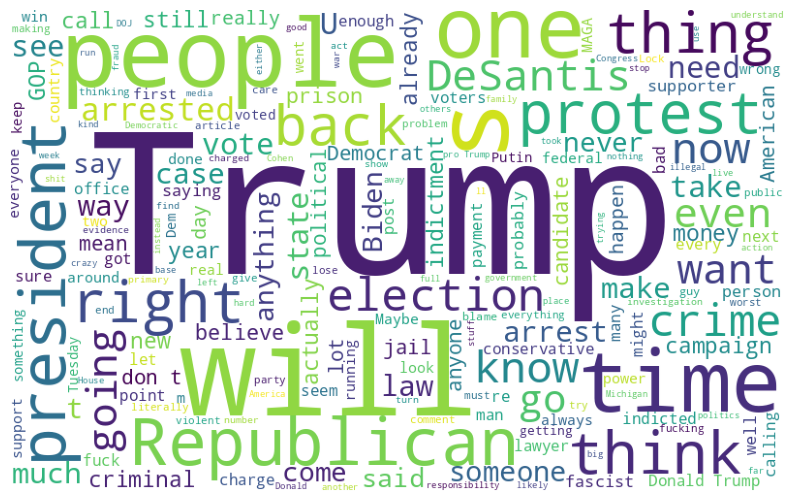

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
negative_words = ' '.join(negative_df['Comment_Body'])
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(negative_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


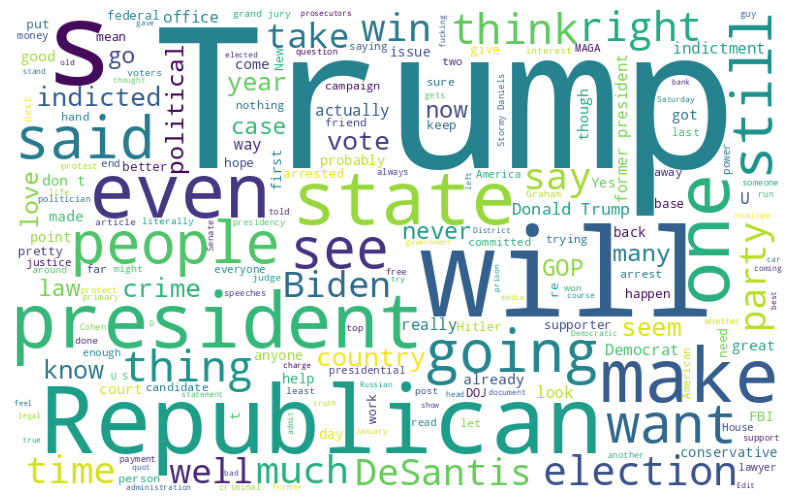

In [55]:
positive_words = ' '.join(positive_df['Comment_Body'])
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(positive_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()